# Q-learning on the Grid World

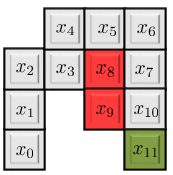

Defines the grid world dynamics presented in the lecture. The actions are defined as follows:  
u = 0 : go right  
u = 1 : go up  
u = 2 : go left  
u = 3 : go down  
The input is the current state, and chosen action, the output is the next state and the reward.

In [ ]:
import numpy as np

def gridworld(x, u):
    # Transition Matrix
    T = np.array([
        [0, 1, 0, 0],
        [1, 2, 1, 0],
        [3, 2, 2, 1],
        [8, 4, 2, 3],
        [5, 4, 4, 3],
        [6, 5, 4, 8],
        [6, 6, 5, 7],
        [7, 6, 8, 10],
        [7, 5, 3, 9],
        [10, 8, 9, 9],
        [10, 7, 9, 11],
        [11, 11, 11, 11]
    ], dtype = int)
    
    # Get the next state
    x2 = T[x, u]
    
    # Reward
    r = -1
    if x2 in [8, 9]:
        r = -2
    elif x == 11:
        r = 0
    
    # Return the next state and reward
    return x2, r

Helper functions needed in the qlearning algorithm

In [ ]:
def get_max_Q(Q, x):
    return np.max(Q[x, :])

def eps_greedy(Q, x, epsilon):
    # Find best action
    best_u = np.argmax(Q[x, :])
    # Define probabilities for each action
    prob_vec = np.ones(4) * epsilon / 3
    prob_vec[best_u] = 1 - epsilon
    # Random draw according to the probabilities
    sumprob = 0
    draw = np.random.rand()
    for i in range(4):
        sumprob += prob_vec[i]
        if sumprob > draw:
            return i
    

The Q-learning algorithm   
$Q_{k+1}(x_t, u_t) = (1-\alpha)\cdot Q_{k}(x_t, u_t) + \alpha \left( r_{t+1} + \gamma \cdot \max_u  Q_{k}(x_{t+1}, u) \right)$

In [ ]:
def qlearn(Q, epsilon, alpha, gamma, Nepisodes):
    
    ######################################
    ### Fill here Q-learning algorithm ###
    ######################################
    

In [ ]:
# Initialize Q and define parameter
Q = np.zeros((12, 4))
epsilon = 0.3
alpha = 0.8
gamma = 1.0
Nepisodes = 20

# Start the Q-learning algorithm
qlearn(Q, epsilon, alpha, gamma, Nepisodes)

In [ ]:
# Try out the greedy policy
x = 0
nsteps = 0
while x != 11:
    u = np.argmax(Q[x, :])
    x2, r = gridworld(x, u)
    nsteps += 1
    x = x2
print(f"Needed {nsteps} to target state")

In [ ]:
# Lets have a look at the Q function it learned.
Q